Le score nutritionnel est calculé avec un système de points. Elle est pénalisée par la teneur en sucre, en graisses saturées, en sodium, en énergie calorique et favorisée par la proportion de fruits et légumes, de fibres et de protéines. La note nutritionnelle est une simplification de la note nutritionnelle pour les clients. **Plus il est faible, plus le produit est considéré comme ayant un profil nutritionnel favorable**.

###  <span style='color:navy'> Import des librairies</span>

In [1]:
import numpy as np
from numpy import mean, std,percentile
import matplotlib.gridspec as gridspec
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
import math
import warnings
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn import metrics
warnings.filterwarnings("ignore")

##  <span style='color:blue'> Import des données</span>

In [2]:
donnees=pd.read_csv('features.csv',sep=',',index_col=0)

In [3]:
df= donnees.copy()

In [4]:
df.columns

Index(['fiber_100g', 'nutrition-score-uk_100g', 'nutrition-score-fr_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'fat_100g', 'sugars_100g',
       'sodium_100g', 'salt_100g', 'proteins_100g', 'energy_100g'],
      dtype='object')

In [5]:
featuress= ['nutrition-score-fr_100g', 'fiber_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'fat_100g', 'sugars_100g',
       'sodium_100g', 'salt_100g', 'proteins_100g', 'energy_100g']
df=df[featuress]

In [6]:
df.sample((5))

,nutrition-score-fr_100g,fiber_100g,saturated-fat_100g,carbohydrates_100g,fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g
product_name,,,,,,,,,,
Boisson gazeuse light saveur fruits rouges,2.0,0.0,0.0,0.700,0.0,0.70,0.010,0.02540,0.1,14.0
Fines Bulles Mojito,6.0,0.0,0.0,4.400,0.0,4.40,0.000,0.00000,0.0,79.0
"Mexico Lindo, Salsa Chiltepin",10.0,0.0,0.0,0.000,0.0,0.00,1.100,2.79400,0.0,0.0
Deli Style Dill Pickles,10.0,0.0,0.0,3.330,0.0,3.33,1.033,2.62382,0.0,71.0
Boisson Petillante Kombucha Framboise,4.0,0.0,0.0,0.905,0.0,2.00,0.000,0.00000,0.0,42.0


##  <span style='color:blue'> Analyse univariées </span>

In [7]:
#Aperçue de la base
df.shape

(3288, 10)

###  <span style='color:blue'> Description des données </span>

In [8]:
df.describe()

,nutrition-score-fr_100g,fiber_100g,saturated-fat_100g,carbohydrates_100g,fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g
count,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000
mean,3.372871,0.432901,0.201749,4.290578,0.194037,2.024256,2.444606,6.209358,0.540319,34.194294
std,3.964278,3.267364,2.266951,14.564264,1.949099,8.661003,7.399864,18.795834,3.039573,31.546943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.107500,0.000000,0.000000,0.003937,0.010000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.905000,0.000000,0.280000,0.075000,0.190500,0.000000,25.000000
75%,6.000000,0.000000,0.000000,3.330000,0.000000,1.670000,0.545000,1.384300,0.500000,71.000000
max,25.000000,100.000000,63.000000,100.000000,66.670000,100.000000,39.370079,100.000000,100.000000,84.000000


In [9]:
df.shape[1]

10

###  <span style='color:blue'> Distribution des variables </span>

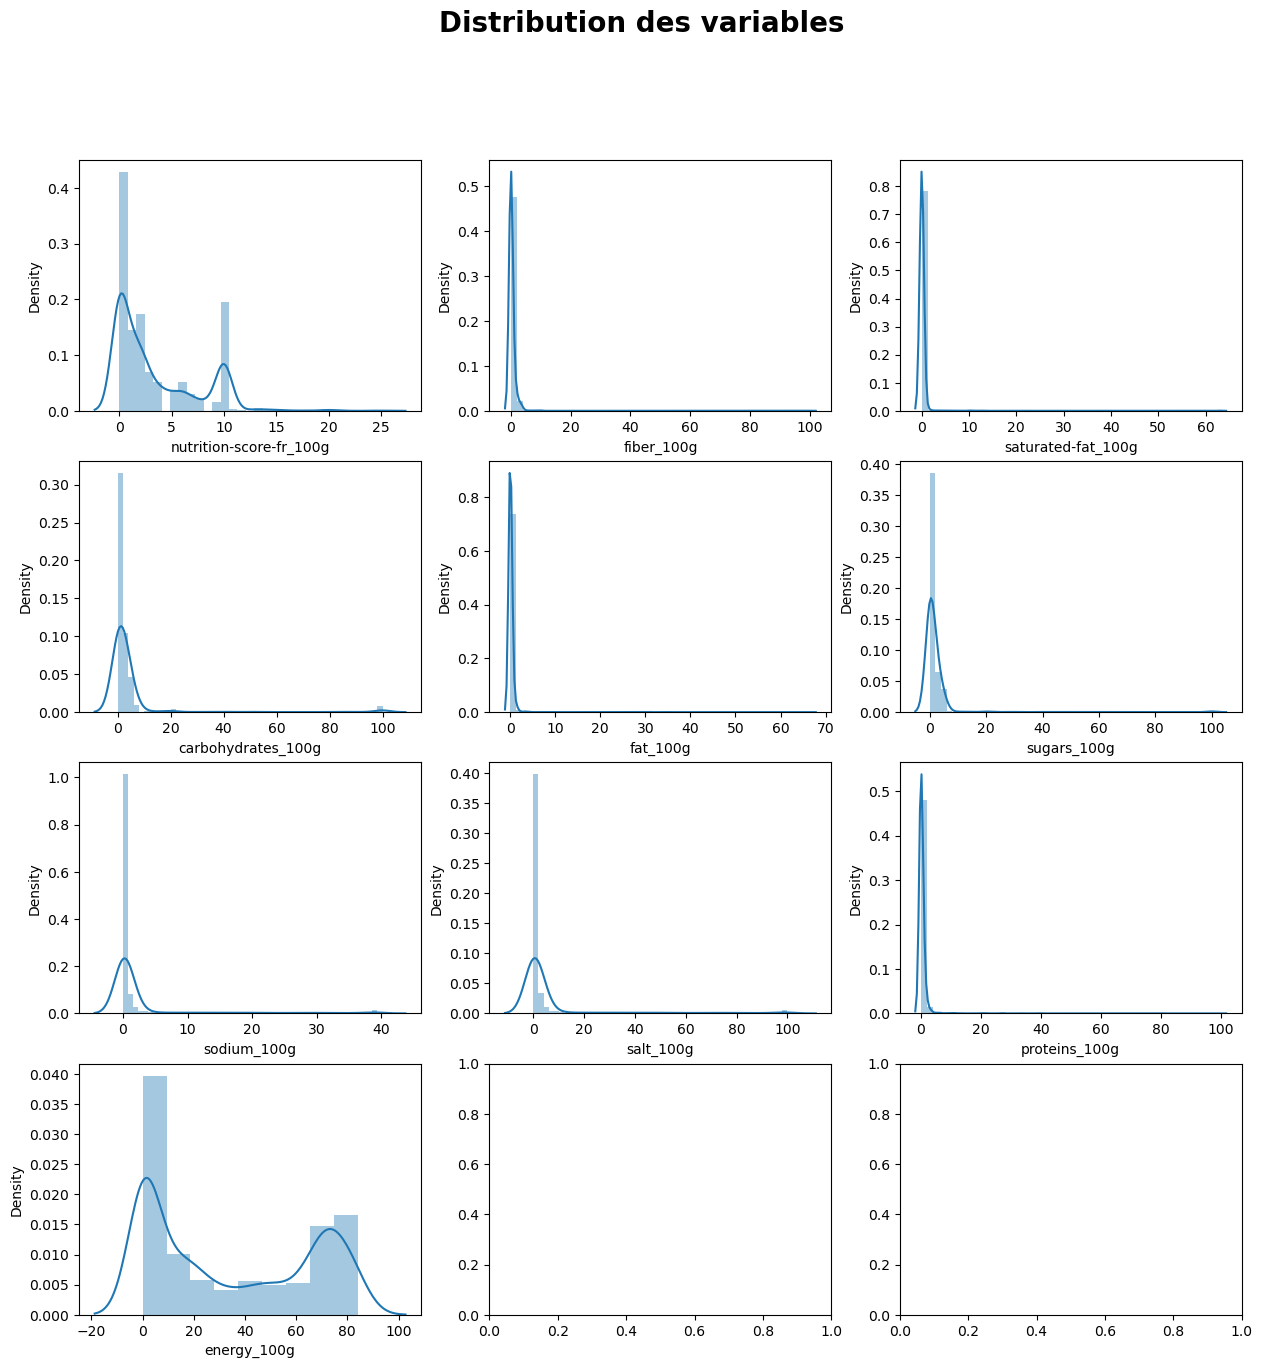

In [10]:
fig, axs = plt.subplots(4,3,figsize=(15,15))
axs = axs.ravel()
for i in range(df.shape[1]): 
    sns.distplot(df[df.columns[i]],ax=axs[i])
fig.suptitle('Distribution des variables',fontweight ="bold",fontsize=20)
plt.show()

- Les courbes des features **fiber_100g,satured-fat_100g, fat_100g, carbohydrates_100g, sugars_100g, sodium_100g, salt_100g et proteins_100g** sont étalées à droite; Les coefficients d'asymétries (skewness en anglais) des differentes indicateurs sont positifs et les coefficients d'applatissements ou Kurtosis sont également positifs; Ce qui signifie que les distributions de ces differentes indicateurs sont moins aplaties que celle de la distribution normale.


- Les courbes des features **nutrition-score-uk_100g, nutrition-score-fr_100g et energy_100g** sont bimodales et tous étalées vers la droits. Les skewness de ces 03 features sont positifs et leur distribution sont moins aplatie que celle de la distribution normale (kurtosis positif egalement).


- <span style='color: red'>Aucune distribution de ces features ne suit pas la loi normale.</span> 
Nous allons effectuer le text de Kolmogorov-smirnov por confirmer ou infirmer cela

####   <span style='color:blue'>Distribution des variables: Test de normalité (Kolmogorov-Smirnov)</span>

- H0 : les valeurs du feauture  sont issus d'une population normalement distribuée.
- H1 :  les valeurs du features ne sont PAS issus d'une population normalement distribuée

In [11]:
alpha= 0.05
print('********************************************************************************')
print('Etude de la normalité')
print('********************************************************************************\n\n')

for i in range(len(df.columns)):
    print('---------------------------------')
    print('Variable {} : '.format(df.columns[i]))
    print('---------------------------------')
    D_obs, pvalue = stats.kstest(df[df.columns[i]], 'norm')
    print('D_obs= {}\nP-value= {}'.format(D_obs,pvalue))
    if pvalue<alpha: 
        print('''P-value<{} L'hypothèse nulle H0 est rejétée\n => la distribution ne suit pas une loi normale'''
              .format(alpha,df.columns[i]))
    else : 
        print('''On ne peut rejete l'hypothèse H1''')
    print('\n')

********************************************************************************
Etude de la normalité
********************************************************************************


---------------------------------
Variable nutrition-score-fr_100g : 
---------------------------------
D_obs= 0.5140503546698256
P-value= 0.0
P-value<0.05 L'hypothèse nulle H0 est rejétée
 => la distribution ne suit pas une loi normale


---------------------------------
Variable fiber_100g : 
---------------------------------
D_obs= 0.5
P-value= 0.0
P-value<0.05 L'hypothèse nulle H0 est rejétée
 => la distribution ne suit pas une loi normale


---------------------------------
Variable saturated-fat_100g : 
---------------------------------
D_obs= 0.5
P-value= 0.0
P-value<0.05 L'hypothèse nulle H0 est rejétée
 => la distribution ne suit pas une loi normale


---------------------------------
Variable carbohydrates_100g : 
---------------------------------
D_obs= 0.5
P-value= 0.0
P-value<0.05 L'hypothè

Acune distribution des features ne suit pas la loi normale. Par ailleurs on ne peut pas appliquer le test Anova pour voir l'independance dû à la normalité des features

##  <span style='color:blue'> Analyses Bivariées</span>

###  <span style='color:blue'> Etude de la corrélation entre les differentes variables </span>

<AxesSubplot:>

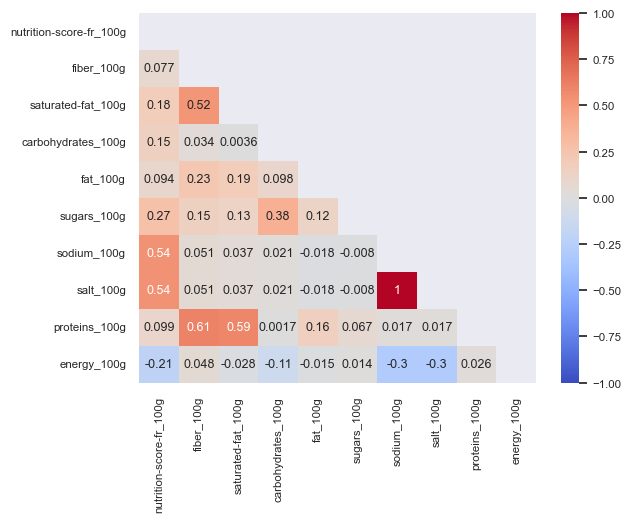

In [12]:
# Répresentation graphique de la matrice de corrélation
sns.set(font_scale=0.75)
matrice_correlation = np.triu(df.corr())
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = matrice_correlation )

On observe une corrélation parfaite (1) entre les features **sodium_100G** et **salt_100g** et une très forte corrélation (0,94) entre les variables **nutrition-score-uk_100g** et  **nutrition-score-fr_100g** comme illuste les nuages de points ci-dessous:

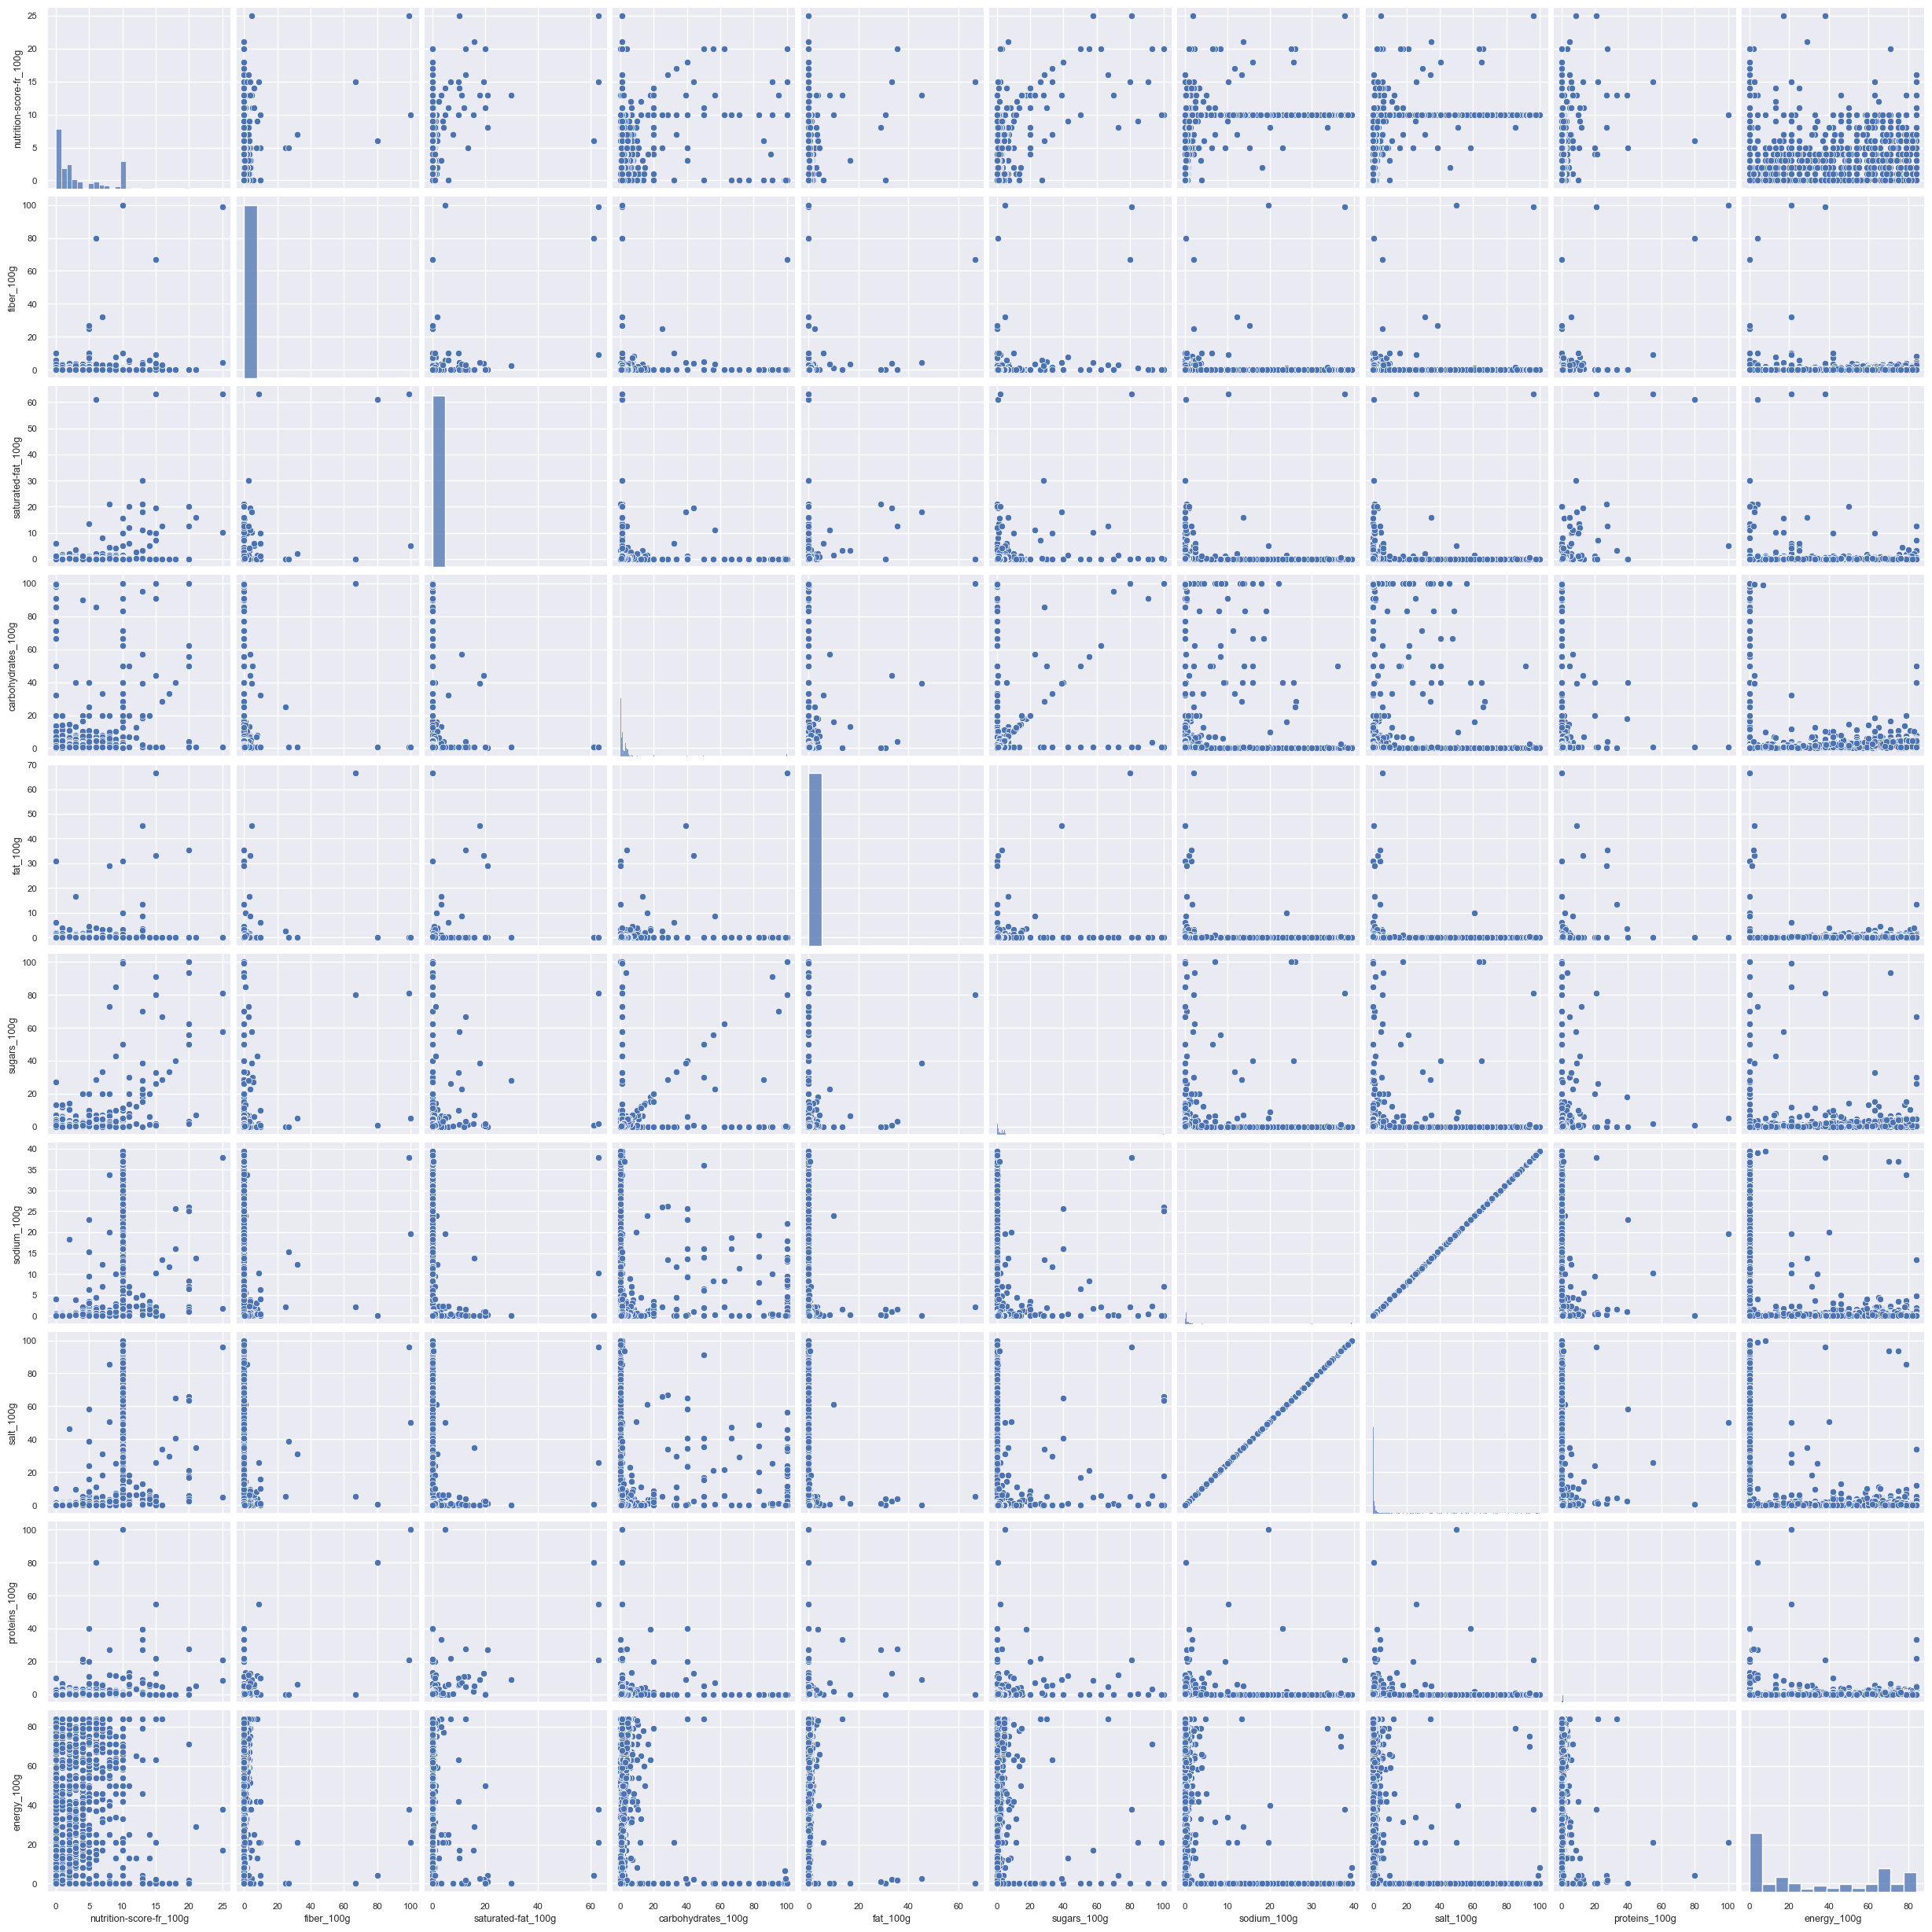

In [13]:
# Create pairplot of all the variables with hue set to class
g=sns.pairplot(df)  
plt.show()

###  <span style='color:blue'> Etude de la corrélation entre la variable nutrition-score-fr_100g et les autres features </span>

In [14]:
#Calcul de la corrélation et P_value
corr = pd.DataFrame(columns=['coef_Spearman','p_value'])
for col in range(1,len(df.columns)):
    coefSpearman, pvalue = stats.spearmanr(df['nutrition-score-fr_100g'], df[df.columns[col]])
    corr.loc[df.columns[col]]=[  coefSpearman,pvalue]  
corr  

,coef_Spearman,p_value
fiber_100g,-0.159228,4.096068e-20
saturated-fat_100g,0.024066,1.677042e-01
carbohydrates_100g,-0.092017,1.253091e-07
fat_100g,-0.063357,2.777573e-04
sugars_100g,-0.096289,3.164708e-08
sodium_100g,0.652469,0.000000e+00
salt_100g,0.652321,0.000000e+00
proteins_100g,-0.150338,4.453526e-18
energy_100g,-0.224260,9.343144e-39


H0: Pas de correlation entre les deux variables

H1: Il y a Corrélation entre les variables 

**Rejet de H0** car **P-value < 0,0001**; donc il existe une corrélation entre chacune des features et la variable nutrition-score-fr_100g comme indique le graphique ci-dessous:

Text(0.5, 0.98, 'Corrélation entre nutrition-score-fr_100g et les autres features')

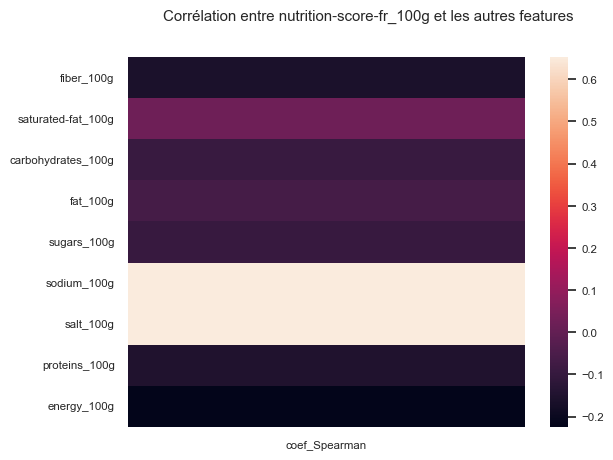

In [15]:
#Graphe de corrélation entre nutrition-score-fr_100g et les autres features
sns.heatmap(corr.drop(columns=['p_value']))
plt.suptitle('Corrélation entre nutrition-score-fr_100g et les autres features')

Après avoir trouvé des correlations entre nos differentes variables, nous allons utilisé une méthode plus poussée (d'etude ce correlation) afin de projetter le nuage des individus sur les axes decorrélés. En effet si certaines variables sont corrélées entre elles, les resultats tirées  n'expliqueront qu'une partie de la variance totale du nuage de points.

##  <span style='color:blue'> Analyse en composantes principales: ACP</span>

In [16]:
#Standardisation des données
df_value = df.values
scaler= StandardScaler()
df_standard = scaler.fit_transform(df_value)
pca = PCA(n_components=10)
df_pca = pca.fit_transform(df_standard)

% Variance  :  [26.7 22.2 14.1  9.   8.6  6.5  5.2  4.1  3.6  0. ]


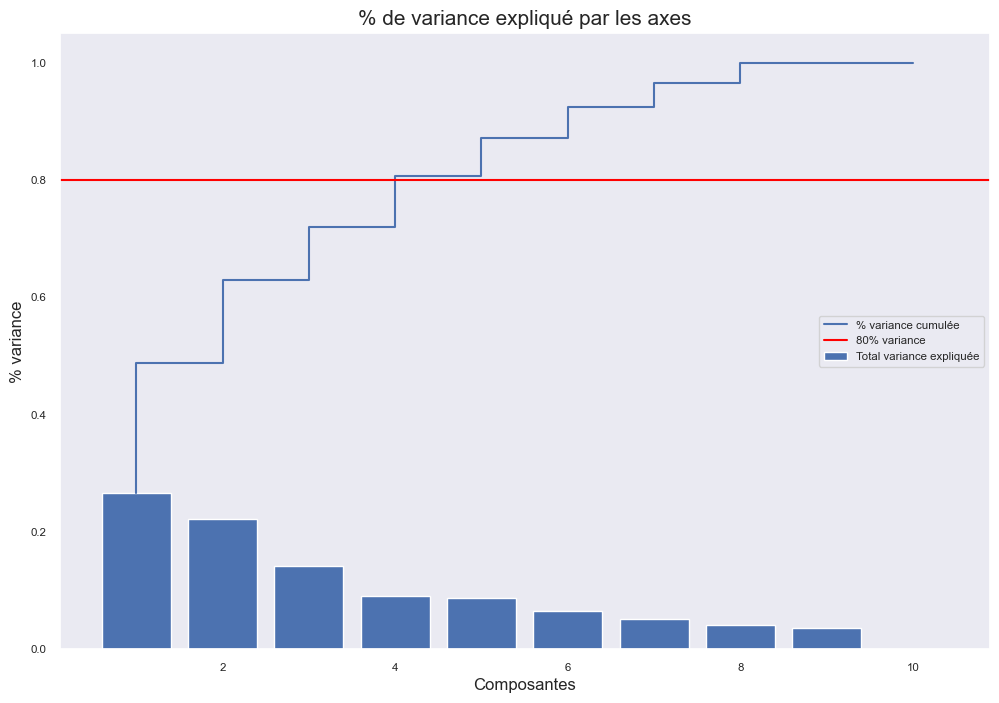

In [17]:
#Pourcentage de variance expliquée
var_ratio = pca.explained_variance_ratio_
print('% Variance  : ',np.around(var_ratio*100,1))
plt.figure(figsize=(12,8))
plt.bar(range(1,len(var_ratio)+1),var_ratio,align='center',label='Total variance expliquée')
plt.step(range(1,len(var_ratio)+1),np.cumsum(var_ratio),label='% variance cumulée')
plt.axhline(y=0.80,color='red',label='80% variance')
plt.xlabel('Composantes',fontsize=12)
plt.ylabel('% variance',fontsize=12)
plt.legend(loc=7)
plt.title('% de variance expliqué par les axes',fontsize=15)
plt.grid()
plt.show()

Eigen Values :  [2.67091427e+00 2.21585755e+00 1.41353344e+00 9.05137999e-01
 8.64558211e-01 6.50267211e-01 5.19753803e-01 4.07719300e-01
 3.55300490e-01 8.52149649e-09] 
-------------



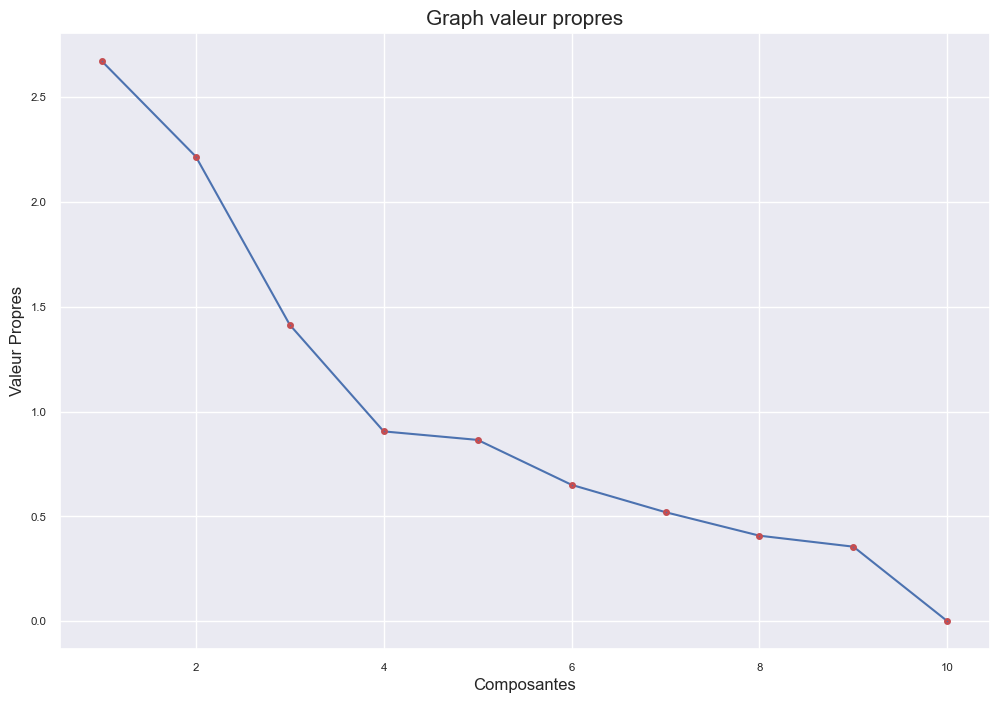

In [18]:
eigen_values = pca.explained_variance_
print('Eigen Values : ',eigen_values,'\n-------------\n')

plt.figure(figsize=(12,8))
plt.plot(range(1,len(eigen_values)+1),eigen_values,marker='.',mec='r',mew=2)
plt.title('Graph valeur propres',fontsize=15)
plt.ylabel("Valeur Propres",fontsize=12)
plt.xlabel("Composantes",fontsize=12)
plt.show()


In [19]:
cols = df.columns[0:].tolist()

[ 0.45164423  0.24134419  0.25787245  0.11638848  0.11860363  0.15248095
  0.50544495  0.5054447   0.22948987 -0.23831534] 
 [-0.10666634  0.48064667  0.45717899  0.04302834  0.24398399  0.15621657
 -0.30860308 -0.30860372  0.48864143  0.1832011 ]


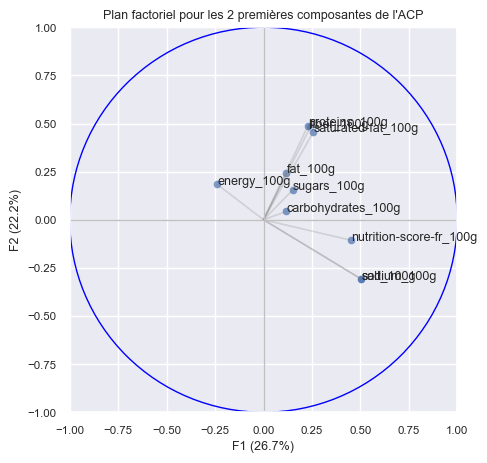

In [20]:
xpca =pca.components_[0,:]
ypca =pca.components_[1,:]

print(pca.components_[0,:],'\n',pca.components_[1,:])
fig, axes = plt.subplots(figsize=(5,5))

plt.title("Plan factoriel pour les 2 premières composantes de l'ACP")
plt.xlabel('F1 ({}%)'.format(np.around(var_ratio[0]*100,1)))
plt.ylabel('F2 ({}%)'.format(np.around(var_ratio[1]*100,1)))

axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

sns.scatterplot(x= xpca, y= ypca ,alpha = 0.7)

for i in range(len(cols)):
    plt.annotate(cols[i], (xpca[i],ypca[i]))
    axes.arrow(0, 0, xpca[i], ypca[i], head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)

[-0.10666634  0.48064667  0.45717899  0.04302834  0.24398399  0.15621657
 -0.30860308 -0.30860372  0.48864143  0.1832011 ] 
 [ 0.16381989 -0.13483759 -0.14491361  0.65077078  0.1642706   0.62370018
 -0.15372688 -0.15372742 -0.21327934 -0.04171832]


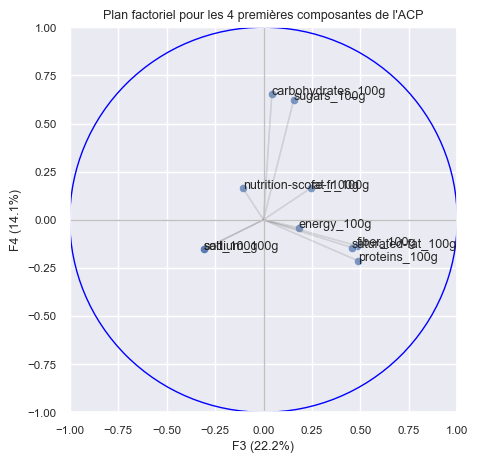

In [21]:
xpca =pca.components_[1,:]
ypca =pca.components_[2,:]

print(pca.components_[1,:],'\n',pca.components_[2,:])
fig, axes = plt.subplots(figsize=(5,5))

plt.title("Plan factoriel pour les 4 premières composantes de l'ACP")
plt.xlabel('F3 ({}%)'.format(np.around(var_ratio[1]*100,1)))
plt.ylabel('F4 ({}%)'.format(np.around(var_ratio[2]*100,1)))

axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

sns.scatterplot(x= xpca, y= ypca ,alpha = 0.7)

for i in range(len(cols)):
    plt.annotate(cols[i], (xpca[i],ypca[i]))
    axes.arrow(0, 0, xpca[i], ypca[i], head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)

In [22]:
feature=['nutrition-score-fr_100g', 'fiber_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'fat_100g', 'sugars_100g', 'sodium_100g',
       'salt_100g', 'proteins_100g', 'energy_100g']

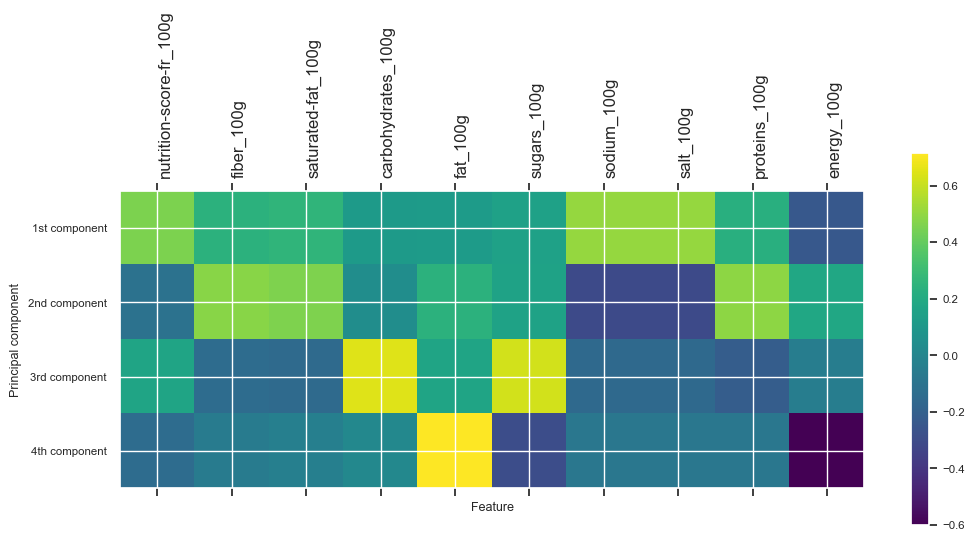

In [23]:
pca = PCA(n_components=4)
df_pca = pca.fit_transform(df_standard)
plt.matshow(pca.components_,cmap='viridis');
plt.yticks([0,1,2,3], ['1st component', '2nd component','3rd component','4th component']);
plt.colorbar();
plt.xticks(range(len(feature)),feature, rotation = 90, fontsize=12, ha = 'left');
plt.xlabel('Feature');
plt.ylabel('Principal component');  

##  <span style='color:blue'> Clustering sur les premiers composantes</span>

###  <span style='color:blue'> Realisation de Kmeans </span>

In [24]:
# utilisation de la métrique "silhouette"
silhouette=[]

# faire varier le nombre de clusters de 2 à 12
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans_pca.fit(df_pca)
    silhouette.append(kmeans_pca.inertia_)

###  <span style='color:blue'> Nombre de clusters à retenir </span>

La methode de Elblow

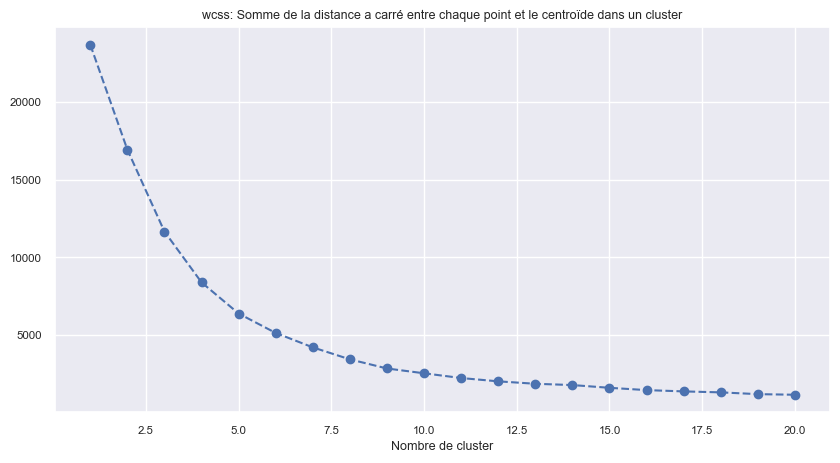

In [25]:
#graphique
fig = plt.figure(figsize=(10,5))
plt.plot(range(1,21),silhouette,marker='o', linestyle='--')
plt.title("wcss: Somme de la distance a carré entre chaque point et le centroïde dans un cluster")
plt.xlabel("Nombre de cluster")

plt.show()

###  <span style='color:blue'> Realisation de Kmeans sur composantes principales avec 04 clusters </span>

In [26]:
#Kmeans avec 4 classes
pca = PCA(n_components=4)
df_pca = pca.fit_transform(df_standard)
kmeans_pca = KMeans(n_clusters=4, init='k-means++',random_state=42)
kmeans_pca.fit(df_pca)

KMeans(n_clusters=4, random_state=42)

###  <span style='color:blue'>Visualisation les clusters </span>

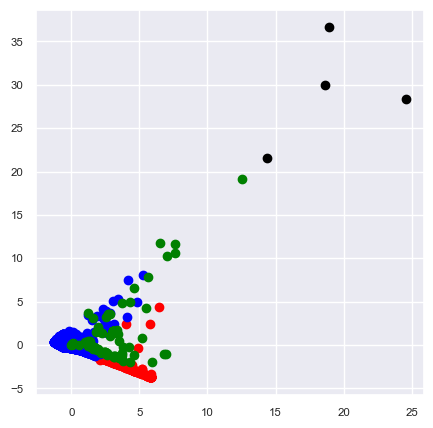

In [27]:
#Visualisation des clusters
pca = PCA(n_components=4)
df_pca = pca.fit_transform(df_standard)
fig = plt.figure(figsize=(5,5))
for couleur,k in zip(['red','blue','black','green'],
                     [0,1,2,3]):    
    plt.scatter(df_pca[kmeans_pca.labels_==k,0],df_pca[kmeans_pca.labels_==k,1],c=couleur)

plt.show()

###  <span style='color:blue'>Ajout des clusters et composantes dans le datFrame </span>

In [28]:
df_f=pd.concat([df.reset_index(drop=False),pd.DataFrame(df_pca)], axis=1)
df_f.columns.values[-4: ]=["composant_1","composant_2","composant_3","composant_4"]
df_f['cluster']=kmeans_pca.labels_

###  <span style='color:blue'>Visualisation les clusters sur les deux premiers composantes </span>

In [30]:
df_f['classe']=df_f['cluster'].map({0:'C1',1:'C2',2:'C3',3:'C4'})